In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
d  =  pd.read_csv('advertising.csv')

In [3]:
df = pd.DataFrame(d)

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Correct data types

In [7]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Huge difference between min and max in each column

newspaper is least spreaded

TV is most spreaded

In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

#No null values in the dataset

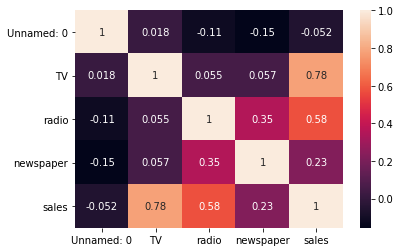

In [9]:
sns.heatmap(df.corr(),annot=True)

Maximum relation with TV

Least relation with newspaper

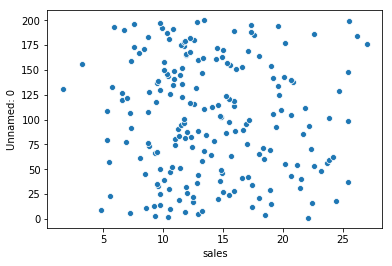

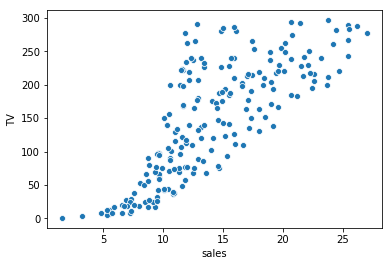

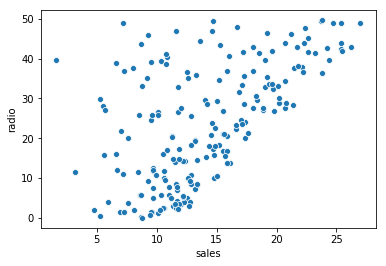

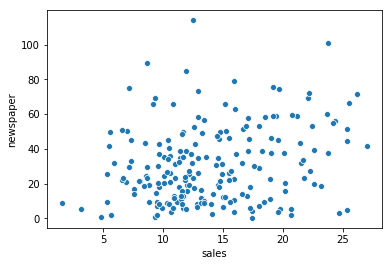

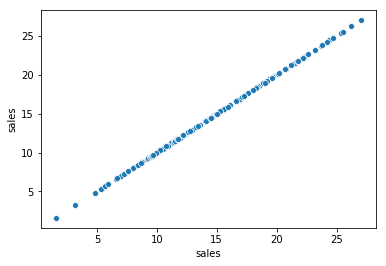

In [10]:
for i in df.columns:
    sns.scatterplot(x='sales',y=i,data=df)
    plt.show()

newspaper has no relation with sales

positive relation with tv and radio

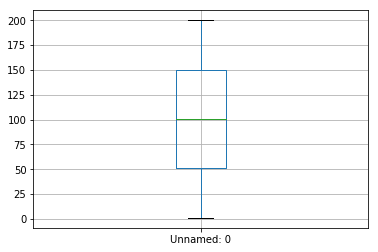

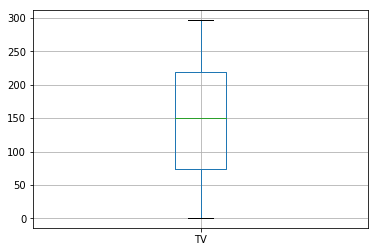

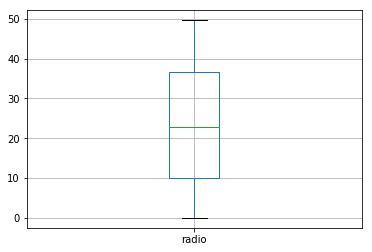

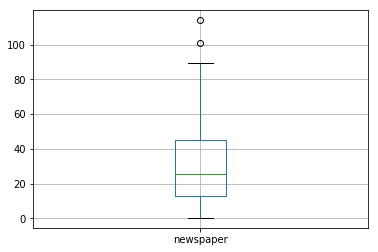

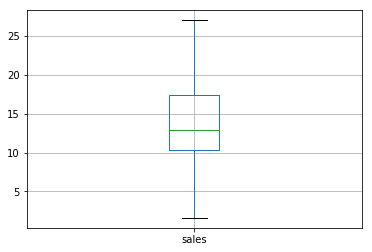

In [11]:
for i in df.columns:
    df.boxplot(i)
    plt.show()

No outliers in the datset

In [12]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
for i in df.columns:
    print(i,df.var()[i])

TV 7370.949893216087
radio 220.4277427135678
newspaper 474.30832562814095
sales 27.221853015075364


TV has highest variance(spread of data)

Whereas radio has least

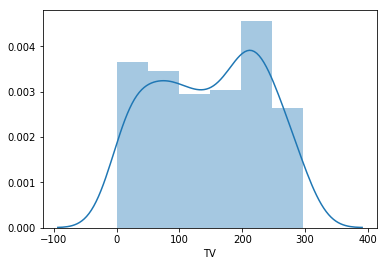

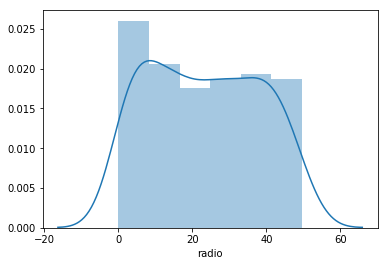

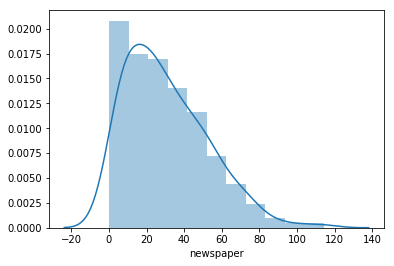

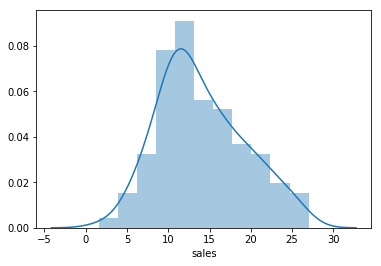

In [14]:
for i in df.columns:
    plt.show()
    sns.distplot(df[i])

Newspaper is right skewed

For rest columns:near to normal distribution

In [15]:
for i in df.columns:
    print(i,df[i].skew())

TV -0.06985336213274573
radio 0.09417463149664404
newspaper 0.8947204074986175
sales 0.4075714250767127


newspaper is extremely skewed

taking thresold as +-0.5 each column is skewed

In [16]:
from sklearn.preprocessing import power_transform
df1 = pd.DataFrame(power_transform(df),columns=df.columns)

In [17]:
df1.head()

,TV,radio,newspaper,sales
0,0.948674,0.962247,1.514335,1.464412
1,-1.191314,1.040179,0.787683,-0.650693
2,-1.647757,1.370710,1.516998,-0.894550
3,0.141020,1.142387,1.214656,0.882528
4,0.452715,-0.748651,1.211704,-0.134550


In [18]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_new = pd.DataFrame(min_max.fit_transform(df1),columns=df1.columns)

In [20]:
df_new.head(3)

,TV,radio,newspaper,sales
0,0.827151,0.833914,0.790880,0.864569
1,0.234936,0.856003,0.641184,0.470762
2,0.108621,0.949689,0.791429,0.425359


#data is scaled

Finding best random state for splitting

the test and train variable

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [23]:
x = df_new.drop('sales',axis=1)
y = df_new['sales']

In [24]:
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=i)
    lr =  LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    r_score = r2_score(y_test,pred)
    error = mean_squared_error(y_test,pred)
    print('random_state',i)
    print('R score',r_score,'Error',error)
    print('RMS error',np.sqrt(error))

random_state 1
R score 0.9314929763219927 Error 0.002318787191671969
RMS error 0.04815378688817702
random_state 2
R score 0.8376124490156727 Error 0.005498374488857732
RMS error 0.07415102486721092
random_state 3
R score 0.8662160953736046 Error 0.0056436985972593955
RMS error 0.07512455389058491
random_state 4
R score 0.9103856297242333 Error 0.002704317303707917
RMS error 0.052003050907691147
random_state 5
R score 0.9124043619477951 Error 0.002488114269890714
RMS error 0.04988100109150491
random_state 6
R score 0.9048833752592385 Error 0.002480872167656725
RMS error 0.04980835439619267
random_state 7
R score 0.9198573247041206 Error 0.0028595791540861645
RMS error 0.05347503299752292
random_state 8
R score 0.8864017022276609 Error 0.004167533644491887
RMS error 0.06455643766884823
random_state 9
R score 0.9300208157219678 Error 0.0020710036243700323
RMS error 0.045508280832943275
random_state 10
R score 0.868927755664998 Error 0.0060417299519972805
RMS error 0.07772856586865141
rand

Taking 9 as the random_state for spitting the data :
    
    
R score 0.9300208157219678 

Error 0.0020710036243700323

RMS error 0.045508280832943275

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=9)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [27]:
list_algo = [LinearRegression,SVR,DecisionTreeRegressor,KNeighborsRegressor]

In [28]:
for i in list_algo:
    obj = i()
    obj.fit(x_train,y_train)
    pred = obj.predict(x_test)
    print(i,'r2_score',r2_score(y_test,pred))
    print('mean squared error',mean_squared_error(y_test,pred))
    print('rms',np.sqrt(mean_squared_error(y_test,pred)))
    print('---------')


<class 'sklearn.linear_model._base.LinearRegression'> r2_score 0.9300208157219678
mean squared error 0.0020710036243700323
rms 0.045508280832943275
---------
<class 'sklearn.svm._classes.SVR'> r2_score 0.9272305421005378
mean squared error 0.0021535805626779533
rms 0.04640668661602499
---------
<class 'sklearn.tree._classes.DecisionTreeRegressor'> r2_score 0.9274556443580667
mean squared error 0.002146918758942945
rms 0.04633485468783673
---------
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> r2_score 0.9433804961568424
mean squared error 0.0016756296730086682
rms 0.040934455816691494
---------


right now kneighbors is giving best result , 

then Linear_regression

In [29]:
from sklearn.model_selection import cross_val_score

 Finding best cv value for cross validation

In [32]:
lr = LinearRegression()
for i in range(2,21):
    lr.fit(x_train,y_train)
    pred = obj.predict(x_test)
    print('r2_score',r2_score(y_test,pred))
    cross_score = cross_val_score(lr,x,y,cv=i)
    print('cv...',i)
    print(cross_score.mean())
    print('-------')

r2_score 0.9433804961568424
cv... 2
0.9052112832663652
-------
r2_score 0.9433804961568424
cv... 3
0.9028468729966699
-------
r2_score 0.9433804961568424
cv... 4
0.9043627610004317
-------
r2_score 0.9433804961568424
cv... 5
0.9005787344239
-------
r2_score 0.9433804961568424
cv... 6
0.9066854242879342
-------
r2_score 0.9433804961568424
cv... 7
0.9023951183707116
-------
r2_score 0.9433804961568424
cv... 8
0.9008261296898245
-------
r2_score 0.9433804961568424
cv... 9
0.9004134061514786
-------
r2_score 0.9433804961568424
cv... 10
0.9021422918437463
-------
r2_score 0.9433804961568424
cv... 11
0.8964023235920067
-------
r2_score 0.9433804961568424
cv... 12
0.9031881630778451
-------
r2_score 0.9433804961568424
cv... 13
0.9038976300327775
-------
r2_score 0.9433804961568424
cv... 14
0.8985648624600973
-------
r2_score 0.9433804961568424
cv... 15
0.8986308280955192
-------
r2_score 0.9433804961568424
cv... 16
0.9009961857040033
-------
r2_score 0.9433804961568424
cv... 17
0.892291784605

taking best cv = 6 

as r_score for each cv is equal so keeping cross_val_score in consideration 

taking 6 as cv

In [33]:
for i in list_algo:
    obj = i()
    obj.fit(x_train,y_train)
    pred = obj.predict(x_test)
    cross_score = cross_val_score(obj,x,y,cv=6)
    print('cross score',cross_score.mean())
    print(i,'r2_score',r2_score(y_test,pred))
    print('mean squared error',mean_squared_error(y_test,pred))
    print('rms',np.sqrt(mean_squared_error(y_test,pred)))
    print('---------')

cross score 0.9066854242879342
<class 'sklearn.linear_model._base.LinearRegression'> r2_score 0.9300208157219678
mean squared error 0.0020710036243700323
rms 0.045508280832943275
---------
cross score 0.9014795004616069
<class 'sklearn.svm._classes.SVR'> r2_score 0.9272305421005378
mean squared error 0.0021535805626779533
rms 0.04640668661602499
---------
cross score 0.9461553822037513
<class 'sklearn.tree._classes.DecisionTreeRegressor'> r2_score 0.9314693712720931
mean squared error 0.0020281342507789996
rms 0.04503481154372692
---------
cross score 0.9272743542362595
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> r2_score 0.9433804961568424
mean squared error 0.0016756296730086682
rms 0.040934455816691494
---------


Decision tree Regressor is giving best result here

then kneighbors

In [35]:
dtr = DecisionTreeRegressor()

#performing hyper parametric tuning for optimization

In [36]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {"criterion": ["mse", "mae"],
                 "splitter":['best','random'],
                  }

grid_cv_dtr= GridSearchCV(dtr, param_grid, cv=5)
              

In [42]:
grid_cv_dtr.fit(x,y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'splitter': ['best', 'random']})

In [43]:
best_para = grid_cv_dtr.best_params_
print(best_para)
best_res = grid_cv_dtr.best_score_
print(best_res)

{'criterion': 'mse', 'splitter': 'random'}
0.9394875879228384


Got optimal paramters

In [44]:
dtr = DecisionTreeRegressor(criterion='mse',splitter='random')
dtr.fit(x_train,y_train)
pred = dtr.predict(x_test)

In [45]:
print(r2_score(y_test,pred))

0.9455547204843756


In [46]:
print(mean_squared_error(y_test,pred))

0.0016112844465106767


Saving best Model

In [47]:
import pickle
sales = 'pickl.pkl'
pickle.dump(dtr,open(sales,'wb'))

Conclusion

In [48]:
original_res = np.array(y_test)
pred_res = np.array(dtr.predict(x_test))
df_comparison = pd.DataFrame({'original':pred_res,'predicted':pred_res})
df_comparison

,original,predicted
0,0.878970,0.878970
1,0.350444,0.350444
2,0.826428,0.826428
3,0.808465,0.808465
4,0.698535,0.698535
...,...,...
61,0.403971,0.403971
62,0.658529,0.658529
63,0.566862,0.566862
64,0.718060,0.718060
